In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd



2023-11-20 23:37:18.063538: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 23:37:18.063567: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 23:37:18.063602: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print("We got a GPU")
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("Sorry, no GPU for you...")


We got a GPU


In [3]:
df = pd.read_csv('../Datasets/powerconsumption.csv', parse_dates=['Datetime'], index_col=['Datetime'])
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259


In [4]:
df['powerconsumption'] = df[['PowerConsumption_Zone1','PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean(axis=1)
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,powerconsumption
Datetime,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,23475.178480
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,23106.947957
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,22601.073977
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,21829.744030
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,21216.815423
...,...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,24266.028863
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23661.269287
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,22891.683217


In [5]:
df.sort_values(by='Datetime', ascending=True)
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,powerconsumption
Datetime,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,23475.178480
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,23106.947957
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,22601.073977
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,21829.744030
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,21216.815423
...,...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,24266.028863
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23661.269287
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,22891.683217


In [6]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df = scaler.fit_transform(df.to_numpy())
# df = pd.DataFrame(df, columns=[
#   'Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'powerconsumption'])
# df

In [7]:
Temp_max = df["Temperature"].max()
Hum_max = df["Humidity"].max()
WindSpeed_max = df["WindSpeed"].max()
demand_max = df["powerconsumption"].max()
df[['Temperature']] = df[['Temperature']]/Temp_max
df[['Humidity']] = df[['Humidity']]/Hum_max
df[['WindSpeed']] = df[['WindSpeed']]/WindSpeed_max
df[['powerconsumption']] = df[['powerconsumption']]/demand_max
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,powerconsumption
Datetime,,,,,,,,,
2017-01-01 00:00:00,0.163934,0.778481,0.012803,0.051,0.119,34055.69620,16128.87538,20240.96386,0.524749
2017-01-01 00:10:00,0.160310,0.785865,0.012803,0.070,0.085,29814.68354,19375.07599,20131.08434,0.516517
2017-01-01 00:20:00,0.157786,0.785865,0.012340,0.062,0.100,29128.10127,19006.68693,19668.43373,0.505209
2017-01-01 00:30:00,0.152987,0.791139,0.012803,0.091,0.096,28228.86076,18361.09422,18899.27711,0.487968
2017-01-01 00:40:00,0.147988,0.798523,0.012494,0.048,0.085,27335.69620,17872.34043,18442.40964,0.474267
...,...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,0.175206,0.763713,0.012340,0.040,0.096,31160.45627,26857.31820,14780.31212,0.542427
2017-12-30 23:20:00,0.173632,0.765823,0.012648,0.051,0.093,30430.41825,26124.57809,14428.81152,0.528908
2017-12-30 23:30:00,0.172457,0.767932,0.013265,0.084,0.074,29590.87452,25277.69254,13806.48259,0.511706


In [8]:
WindSpeed_max

6.483

In [9]:
df = df[['Temperature', 'Humidity', 'WindSpeed', 'powerconsumption']]
df

,Temperature,Humidity,WindSpeed,powerconsumption
Datetime,,,,
2017-01-01 00:00:00,0.163934,0.778481,0.012803,0.524749
2017-01-01 00:10:00,0.160310,0.785865,0.012803,0.516517
2017-01-01 00:20:00,0.157786,0.785865,0.012340,0.505209
2017-01-01 00:30:00,0.152987,0.791139,0.012803,0.487968
2017-01-01 00:40:00,0.147988,0.798523,0.012494,0.474267
...,...,...,...,...
2017-12-30 23:10:00,0.175206,0.763713,0.012340,0.542427
2017-12-30 23:20:00,0.173632,0.765823,0.012648,0.528908
2017-12-30 23:30:00,0.172457,0.767932,0.013265,0.511706


In [52]:
def create_time_windows(data, window_size, step_size):
    windows = []
    targets = []
    date = []

    for i in range(0, len(data) - window_size, step_size):
        window = data.iloc[i:i + window_size]
        target = data['powerconsumption'].iloc[i + window_size]  # Assuming 'Radiation' is the target variable


        date.append(data.index[i + window_size])
        

        windows.append(window.values)
        targets.append(target)
        

    return windows, targets,date

X, y,date = create_time_windows(df, 7, 1)
X, y

([array([[0.16393402, 0.77848101, 0.01280271, 0.52474859],
         [0.16030992, 0.78586498, 0.01280271, 0.51651741],
         [0.15778555, 0.78586498, 0.01233997, 0.50520944],
         [0.15298675, 0.79113924, 0.01280271, 0.48796764],
         [0.147988  , 0.79852321, 0.01249422, 0.47426664],
         [0.14628843, 0.81118143, 0.01249422, 0.46324568],
         [0.14098975, 0.81962025, 0.01233997, 0.45405113]]),
  array([[0.16030992, 0.78586498, 0.01280271, 0.51651741],
         [0.15778555, 0.78586498, 0.01233997, 0.50520944],
         [0.15298675, 0.79113924, 0.01280271, 0.48796764],
         [0.147988  , 0.79852321, 0.01249422, 0.47426664],
         [0.14628843, 0.81118143, 0.01249422, 0.46324568],
         [0.14098975, 0.81962025, 0.01233997, 0.45405113],
         [0.13736566, 0.82489451, 0.01311121, 0.44383857]]),
  array([[0.15778555, 0.78586498, 0.01233997, 0.50520944],
         [0.15298675, 0.79113924, 0.01280271, 0.48796764],
         [0.147988  , 0.79852321, 0.01249422, 0.4742

In [55]:
y_test_date = date[42000:]

In [11]:
type(y)

list

In [12]:
X = np.array(X)
y = np.array(y)
X, y

(array([[[0.16393402, 0.77848101, 0.01280271, 0.52474859],
         [0.16030992, 0.78586498, 0.01280271, 0.51651741],
         [0.15778555, 0.78586498, 0.01233997, 0.50520944],
         ...,
         [0.147988  , 0.79852321, 0.01249422, 0.47426664],
         [0.14628843, 0.81118143, 0.01249422, 0.46324568],
         [0.14098975, 0.81962025, 0.01233997, 0.45405113]],
 
        [[0.16030992, 0.78586498, 0.01280271, 0.51651741],
         [0.15778555, 0.78586498, 0.01233997, 0.50520944],
         [0.15298675, 0.79113924, 0.01280271, 0.48796764],
         ...,
         [0.14628843, 0.81118143, 0.01249422, 0.46324568],
         [0.14098975, 0.81962025, 0.01233997, 0.45405113],
         [0.13736566, 0.82489451, 0.01311121, 0.44383857]],
 
        [[0.15778555, 0.78586498, 0.01233997, 0.50520944],
         [0.15298675, 0.79113924, 0.01280271, 0.48796764],
         [0.147988  , 0.79852321, 0.01249422, 0.47426664],
         ...,
         [0.14098975, 0.81962025, 0.01233997, 0.45405113],
        

In [13]:
len(X)

52409

In [14]:
X.shape, y.shape


((52409, 7, 4), (52409,))

In [15]:
X_train = X[:42000]
y_train = y[:42000]
X_test = X[42000:]
y_test = y[42000:]

In [50]:
len(X_test)


10409

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.GRU(100, activation='tanh', input_shape =(X.shape[1], X.shape[2]), return_sequences=True),
    tf.keras.layers.GRU(50, activation='tanh', return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation = 'sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam', loss = 'mse')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 7, 100)            31800     
                                                                 
 gru_1 (GRU)                 (None, 50)                22800     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 20)                1020      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 55641 (217.35 KB)
Trainable params: 55641 (217.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="../logs/load/gru__{}".format(1))

In [20]:
path = '../model/load_gru_n.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath =  path, monitor = 'val_loss', save_best_only=True, verbose=1, mode = min)

In [21]:
results = model.fit(X_train, y_train, epochs = 50, batch_size=128, validation_split=0.2, verbose=1, callbacks=[checkpoint,tensorboard_callback])

Epoch 1/50
258/263 [============================>.] - ETA: 0s - loss: 0.0027
Epoch 1: val_loss improved from inf to 0.00022, saving model to ../model/load_gru_n.h5
263/263 [==============================] - 4s 5ms/step - loss: 0.0026 - val_loss: 2.1690e-04
Epoch 2/50
 50/263 [====>.........................] - ETA: 0s - loss: 3.8730e-04

/home/navneeth/anaconda3/envs/tensor/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


256/263 [============================>.] - ETA: 0s - loss: 3.0552e-04
Epoch 2: val_loss improved from 0.00022 to 0.00011, saving model to ../model/load_gru_n.h5
263/263 [==============================] - 1s 3ms/step - loss: 3.0369e-04 - val_loss: 1.0708e-04
Epoch 3/50
244/263 [==========================>...] - ETA: 0s - loss: 2.1850e-04
Epoch 3: val_loss improved from 0.00011 to 0.00010, saving model to ../model/load_gru_n.h5
263/263 [==============================] - 1s 3ms/step - loss: 2.1791e-04 - val_loss: 9.8517e-05
Epoch 4/50
251/263 [===========================>..] - ETA: 0s - loss: 1.9411e-04
Epoch 4: val_loss improved from 0.00010 to 0.00008, saving model to ../model/load_gru_n.h5
263/263 [==============================] - 1s 4ms/step - loss: 1.9279e-04 - val_loss: 8.0021e-05
Epoch 5/50
262/263 [============================>.] - ETA: 0s - loss: 1.6498e-04
Epoch 5: val_loss improved from 0.00008 to 0.00006, saving model to ../model/load_gru_n.h5
263/263 [=======================

In [22]:
y_pred = model.predict(X_test)

326/326 [==============================] - 1s 2ms/step


In [47]:
len(y_pred)

10409

In [23]:
model.evaluate(X_test, y_test)

326/326 [==============================] - 1s 3ms/step - loss: 2.7263e-05


2.726313869061414e-05

In [49]:
X_test.shape

(10409, 7, 4)

In [ ]:
plt.plot(model.predict(X_test), label='Predicted PowerConsumption')

plt.legend()
plt.show()

In [24]:
y_pred_scale = y_pred * demand_max
y_test_scale = y_test * demand_max

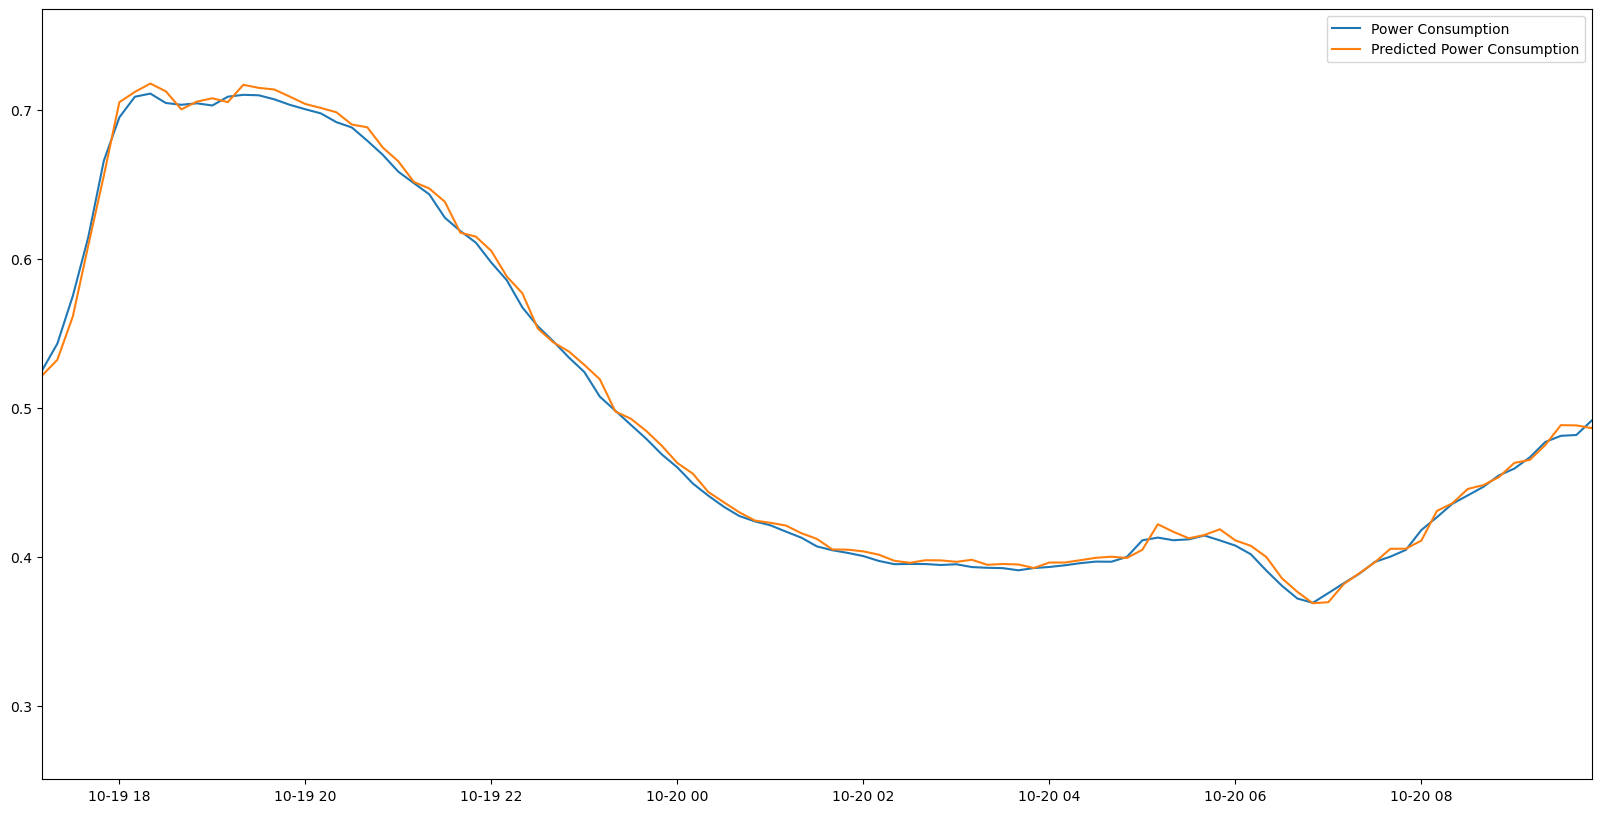

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
#sub plot
# plt.subplot(1,2,1)
plt.xlim(y_test_date[0],y_test_date[100])

plt.plot(y_test_date,y_test, label='Power Consumption')


# plt.subplot(1,2,2)
# plt.xlim(0,100)


#plot date vs powerconsumption
plt.plot(y_test_date,y_pred, label='Predicted Power Consumption')
plt.legend()
plt.show()



